In [94]:
#Import the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [95]:
#Open the csv file in the df
df = pd.read_csv('all_data.csv')
df.rename(columns={'Life expectancy at birth (years)': 'Life_Exp_Age'}, inplace=True)
display(df.head())
#print('')
#print(df.info())

,Country,Year,Life_Exp_Age,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [96]:
#Create a new_df with the new values for the new column GDP in trillions, and convert the values of the GDP column to trillions
df['GDP_in_trillions_$'] = [(x/10**12) for x in df['GDP']]
new_df = df.drop(['GDP'], axis=1)
display(new_df.head())

,Country,Year,Life_Exp_Age,GDP_in_trillions_$
0,Chile,2000,77.3,0.077861
1,Chile,2001,77.3,0.070980
2,Chile,2002,77.8,0.069737
3,Chile,2003,77.9,0.075643
4,Chile,2004,78.0,0.099210


In [97]:
#Create my format for the others columns.
df_format = {'Year':'{:.0f}', 'Life_Exp_Age': '{:.1f}', 'GDP_in_trillions_$': '{:.3f}'}
df_hide = 'GDP'

In [98]:
#Display the Countries and the count of the years for each one.
display(new_df.Country.value_counts().to_frame().reset_index().rename(columns={'Country': 'Years Count', 'index': 'Country'}).style.set_caption('Years per Country').set_properties(width='150px'))

,Country,Years Count
0,Zimbabwe,16
1,United States of America,16
2,China,16
3,Chile,16
4,Mexico,16
5,Germany,16


In [115]:
#Create a new data fram that contain the new_df in describe method but with the columns GDP in trillions in int()
df_describe = new_df.describe()
display(df_describe.style.format(df_format).set_caption('Descriptions of The Values').set_properties(width='100px'))

,Year,Life_Exp_Age,GDP_in_trillions_$
count,96,96.0,96.000
mean,2008,72.8,3.880
std,5,10.7,5.198
min,2000,44.3,0.004
25%,2004,74.5,0.173
50%,2008,76.8,1.280
75%,2011,78.9,4.068
max,2015,81.0,18.100


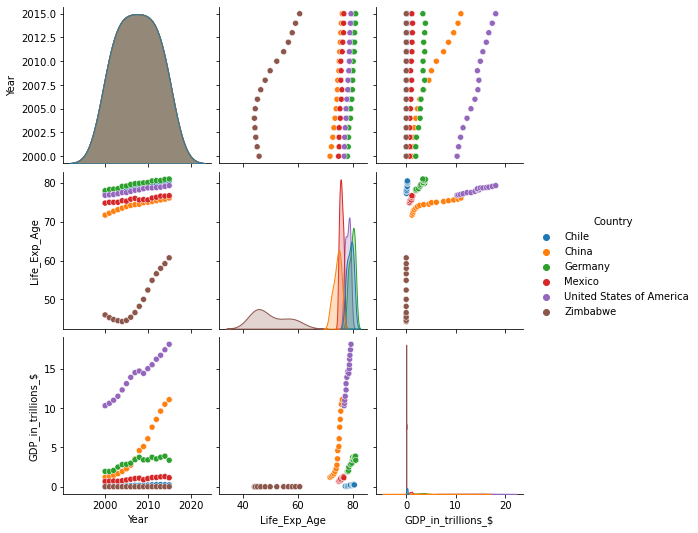

In [110]:
#Visualize the pairplot for each country include Zimbabwe
sns.pairplot(data=new_df, hue='Country')
plt.show()

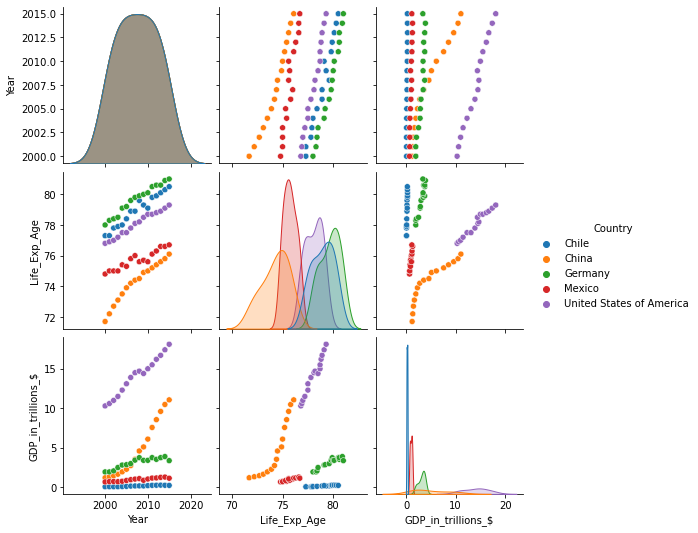

In [113]:
#Visualize the pairplot for each country except Zimbabwe
sns.pairplot(data=new_df[new_df['Country'] != 'Zimbabwe'], hue='Country')
plt.show()

In [120]:
#I will perform the normal test to see the normality of the following columns: GDP in trillions and Life Expectancy.
from scipy import stats
#We put a threshold significance with 0.05
alpha = 0.05
#NormalTest for GDP in trillions
k2, pval = stats.normaltest(new_df['GDP_in_trillions_$'])
#NormalTest for Life Expectancy
K2, p_val = stats.normaltest(new_df['Life_Exp_Age'])

if pval >= alpha:
    print('GDP in trillions has a normal distribution')
else:
    print('GDP in trillions has an abnormal distribution')
if p_val >= alpha:
    print('Life Expectancy Age has a normal distribution')
else:
    print('Life Expecancy Age has an abnormal distribution')

GDP in trillions has an anormal distribution
Life Expecancy Age has an anormal distribution


In [122]:
#I will perform the Kendall Test to see the correlation between GDP and Life Expectancy
T, p = stats.kendalltau(new_df['GDP_in_trillions_$'], new_df['Life_Exp_Age'])
print('"The Kendall Tau": {:.3f} \n "The P-value": {:.3e}'.format(T, p))

"The Kendall Tau": 0.370 
 "The P-value": 9.925e-08


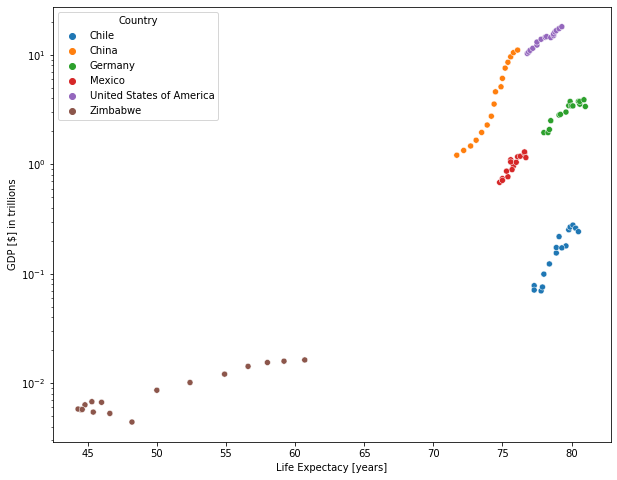

In [136]:
#Now I will make a scatter diagram to observe the correlation between GDP and Life Expectancy of each country as Kendall's test says that the variables have a correlation.
plt.subplots(figsize=(10, 8))
sns.scatterplot(data=new_df, x='Life_Exp_Age', y='GDP_in_trillions_$', hue='Country')
plt.yscale('log')
plt.xlabel('Life Expectacy [years]')
plt.ylabel('GDP [$] in trillions')
plt.show()